In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve , confusion_matrix , auc , f1_score , precision_recall_curve

# 1. Loading the Cardiovascular Disease Prediction Dataset.

In [3]:
df = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")

In [4]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


the first thing we did was loeding the dataset and displaying the first few rows to have a look at the data. We can also see that we have a total of 14 columns or features.

# 2. Data exploration

## 2.1. Dataset structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


The data type of each column in the dataset was displayed using the info() function. Additionally, it was utilized to show the dataset's total number of samples, which is 1000, and features, which is 14. Additionally, it shows the count of non-null values for each feature, indicating whether or not there are any missing values in the data.

## 2.2. Data Visualization

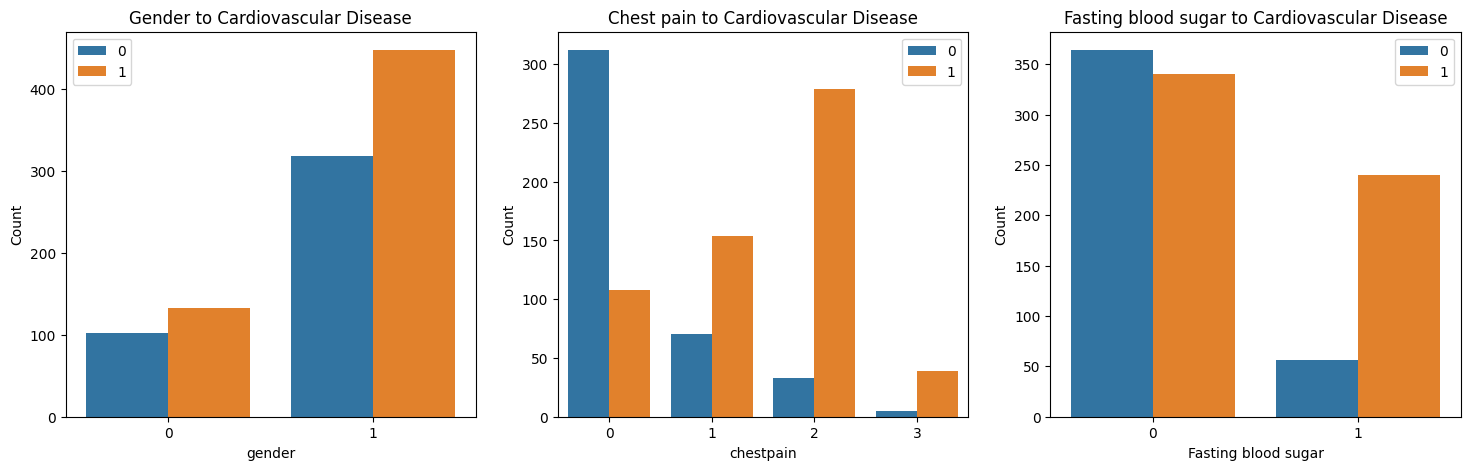

In [ ]:
# Plotting
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=df , hue="target")
plt.title(f'Gender to Cardiovascular Disease')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 3, 2)
sns.countplot(x='chestpain', data=df , hue="target")
plt.title(f'Chest pain to Cardiovascular Disease')
plt.xlabel('chestpain')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 3, 3)
sns.countplot(x='fastingbloodsugar', data=df , hue="target")
plt.title(f'Fasting blood sugar to Cardiovascular Disease')
plt.xlabel('Fasting blood sugar')
plt.ylabel('Count')
plt.legend()

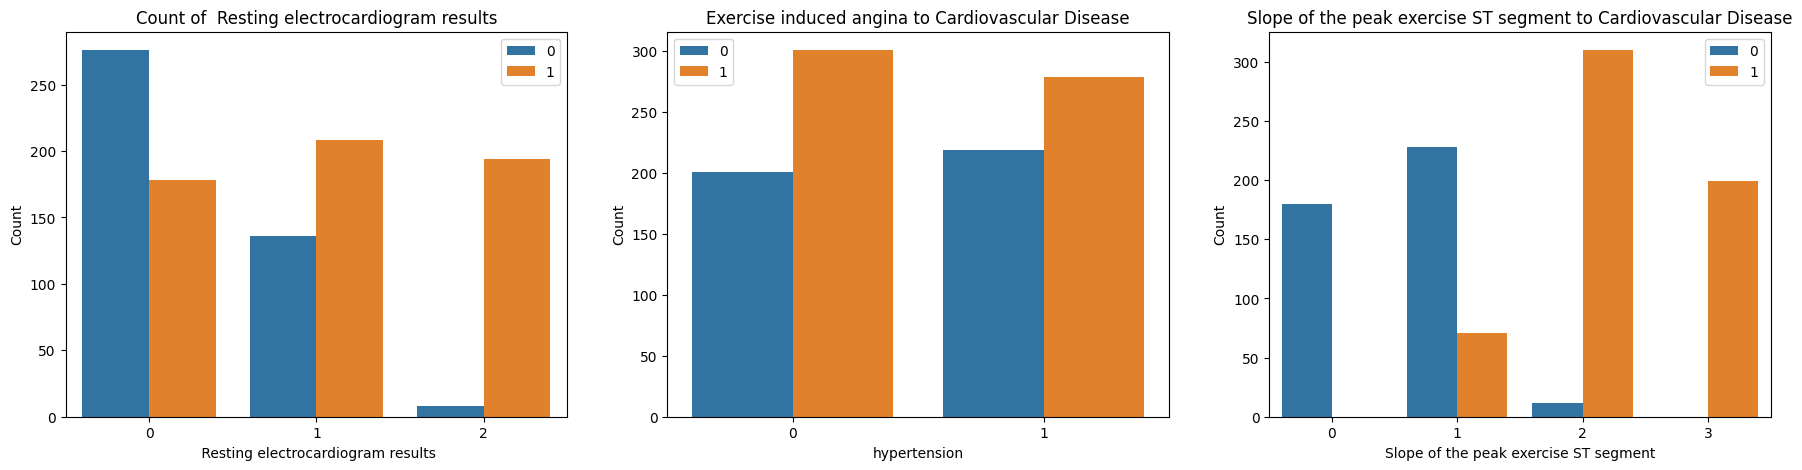

In [ ]:
# Plotting
plt.figure(figsize=(22, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='restingrelectro', data=df , hue="target")
plt.title(f'Count of  Resting electrocardiogram results')
plt.xlabel(' Resting electrocardiogram results')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 3, 2)
sns.countplot(x='exerciseangia', data=df , hue="target")
plt.title(f'Exercise induced angina to Cardiovascular Disease')
plt.xlabel('hypertension')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 3, 3)
sns.countplot(x='slope', data=df , hue="target")
plt.title(f'Slope of the peak exercise ST segment to Cardiovascular Disease')
plt.xlabel('Slope of the peak exercise ST segment')
plt.ylabel('Count')
plt.legend()

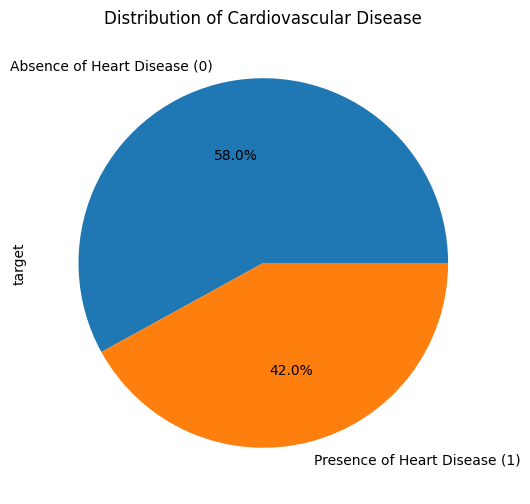

In [ ]:
# Pie Chart or Count Plot for Target Variable
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Absence of Heart Disease (0)', 'Presence of Heart Disease (1)'])
plt.title('Distribution of Cardiovascular Disease')
plt.show()

## 2.3.  Descriptive Statistics

In [ ]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


A list of static values, including count, mean, std, min, max, and percentiles, is provided by using describe() function.

1. Count: the number of values in the column
2. Mean: the average value of the data.
3. Standard Deviation (STD): The square root of the variance, indicating the spread of data.
4. Min: finds the smallest value in the column.
5. Max: finds the greatest value in the column.
6. Percentiles: Values below which a given percentage of data falls, 25%, 50%, 75%.

### 2.3.1. Central tendency

The following measures are employed to assess the central tendency of a distribution of data:
1. Mean: The average value of the data.
2. Median: The middle value when the data is sorted.
3. Mode: The value that appears most frequently in the data.

Pandas provides methods like mean(), median(), and mode() to calculate these measures.

In [ ]:
# Calculate the mean for each column in the DataFrame
mean_values = df.mean()
print(f"Mean values:\n{mean_values}\n")

# Calculate the median for each column in the DataFrame
median_values = df.median()
print(f"Median values:\n{median_values}\n")

# Calculate the mode for each column in the DataFrame
mode_values = df.mode().iloc[0]  # Mode may have multiple values, so we choose the first one
print(f"Mode values:\n{mode_values}\n")

Mean values:
patientid            5.048704e+06
age                  4.924200e+01
gender               7.650000e-01
chestpain            9.800000e-01
restingBP            1.517470e+02
serumcholestrol      3.114470e+02
fastingbloodsugar    2.960000e-01
restingrelectro      7.480000e-01
maxheartrate         1.454770e+02
exerciseangia        4.980000e-01
oldpeak              2.707700e+00
slope                1.540000e+00
noofmajorvessels     1.222000e+00
target               5.800000e-01
dtype: float64

Median values:
patientid            4952508.5
age                       49.0
gender                     1.0
chestpain                  1.0
restingBP                147.0
serumcholestrol          318.0
fastingbloodsugar          0.0
restingrelectro            1.0
maxheartrate             146.0
exerciseangia              0.0
oldpeak                    2.4
slope                      2.0
noofmajorvessels           1.0
target                     1.0
dtype: float64

Mode values:
patientid        

To gain a visual understanding of the central tendency measures of the loaded data, we can utilize the sns.histplot() method to display the column distributions of the dataset.

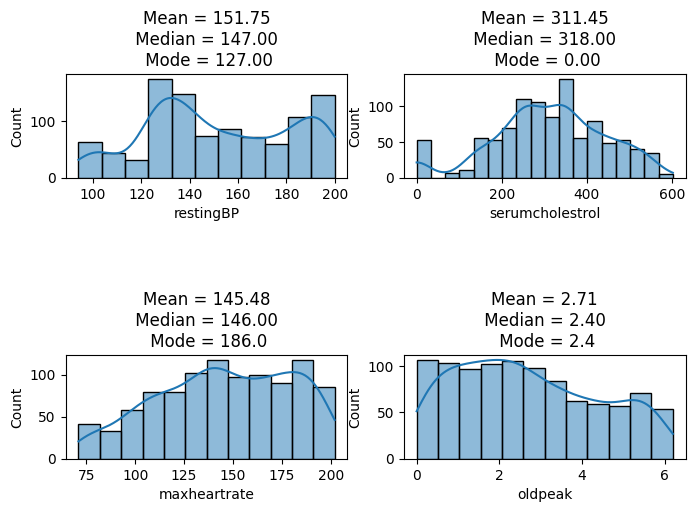

In [ ]:
fig, axs = plt.subplots(figsize=(8, 5),ncols=2,nrows=2)

# Create histograms displaying the distribution of specific column values and incorporate the actual distribution curve.
sns.histplot(data=df, x="restingBP", ax=axs[0, 0], kde=True)
axs[0, 0].set_title(f"Mean = {mean_values['restingBP']:.2f}\n Median = {median_values['restingBP']:.2f} \n Mode = {mode_values['restingBP']:.2f}")

sns.histplot(data=df, x="serumcholestrol", ax=axs[0, 1], kde=True)
axs[0, 1].set_title(f"Mean = {mean_values['serumcholestrol']:.2f}\n Median = {median_values['serumcholestrol']:.2f} \n Mode = {mode_values['serumcholestrol']:.2f}")

sns.histplot(data=df, x="maxheartrate", ax=axs[1, 0], kde=True)
axs[1, 0].set_title(f"Mean = {mean_values['maxheartrate']:.2f}\n Median = {median_values['maxheartrate']:.2f} \n Mode = {mode_values['maxheartrate']}")

sns.histplot(data=df, x="oldpeak", ax=axs[1, 1], kde=True)
axs[1, 1].set_title(f"Mean = {mean_values['oldpeak']:.2f}\n Median = {median_values['oldpeak']:.2f} \n Mode = {mode_values['oldpeak']}")

# Adjust vertical spacing
fig.subplots_adjust(hspace=1.7)

plt.show()


### 2.3.2. Variation

The subsequent metrics are utilized to evaluate the dispersion of data distribution:
1. Variance: A measure of how much the data points deviate from the mean.
2. Standard Deviation: The square root of the variance, indicating the spread of data.

Pandas provides functions such as var() and std() for computing the variance and standard deviation of columns within the DataFrame.*

In [ ]:
# Calculate the variance for each column in the DataFrame
Variance = df.var()
print(f"Variance values:\n{Variance}\n")

# Calculate the standard deviaton for each column in the DataFrame
STD = df.std()
print(f"Standard deviation values:\n{STD}\n")

Variance values:
patientid            8.386263e+12
age                  3.191486e+02
gender               1.799550e-01
chestpain            9.085085e-01
restingBP            8.979149e+02
serumcholestrol      1.754136e+04
fastingbloodsugar    2.085926e-01
restingrelectro      5.930891e-01
maxheartrate         1.168974e+03
exerciseangia        2.502462e-01
oldpeak              2.960992e+00
slope                1.007407e+00
noofmajorvessels     9.556717e-01
target               2.438438e-01
dtype: float64

Standard deviation values:
patientid            2.895905e+06
age                  1.786473e+01
gender               4.242110e-01
chestpain            9.531571e-01
restingBP            2.996523e+01
serumcholestrol      1.324438e+02
fastingbloodsugar    4.567194e-01
restingrelectro      7.701228e-01
maxheartrate         3.419027e+01
exerciseangia        5.002462e-01
oldpeak              1.720753e+00
slope                1.003697e+00
noofmajorvessels     9.775846e-01
target               4

let us use the use the sns.histplot() method to gain a visual understanding of the variation measures of the loaded data.

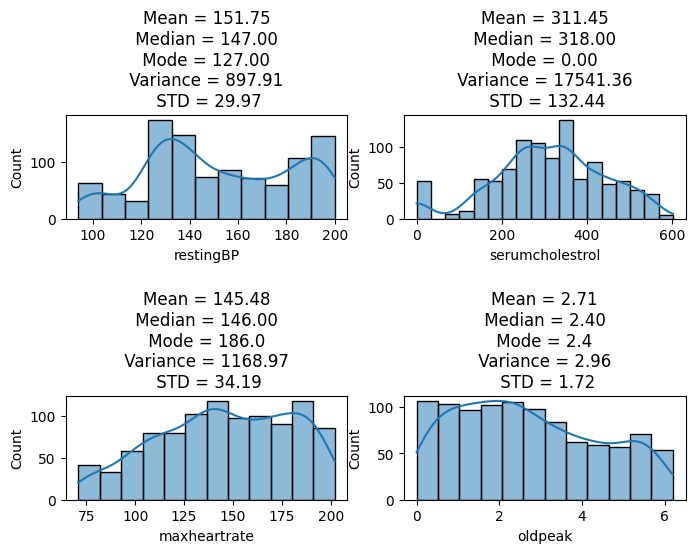

In [ ]:
fig, axs = plt.subplots(figsize=(8, 5),ncols=2,nrows=2)

# Create histograms displaying the distribution of specific column values and incorporate the actual distribution curve.
sns.histplot(data=df, x="restingBP", ax=axs[0, 0], kde=True)
axs[0, 0].set_title(f"Mean = {mean_values['restingBP']:.2f}\n Median = {median_values['restingBP']:.2f} \n Mode = {mode_values['restingBP']:.2f} \n Variance = {Variance['restingBP']:.2f} \n STD = {STD['restingBP']:.2f}")

sns.histplot(data=df, x="serumcholestrol", ax=axs[0, 1], kde=True)
axs[0, 1].set_title(f"Mean = {mean_values['serumcholestrol']:.2f}\n Median = {median_values['serumcholestrol']:.2f} \n Mode = {mode_values['serumcholestrol']:.2f} \n Variance = {Variance['serumcholestrol']:.2f} \n STD = {STD['serumcholestrol']:.2f}")

sns.histplot(data=df, x="maxheartrate", ax=axs[1, 0], kde=True)
axs[1, 0].set_title(f"Mean = {mean_values['maxheartrate']:.2f}\n Median = {median_values['maxheartrate']:.2f} \n Mode = {mode_values['maxheartrate']} \n Variance = {Variance['maxheartrate']:.2f} \n STD = {STD['maxheartrate']:.2f}")

sns.histplot(data=df, x="oldpeak", ax=axs[1, 1], kde=True)
axs[1, 1].set_title(f"Mean = {mean_values['oldpeak']:.2f}\n Median = {median_values['oldpeak']:.2f} \n Mode = {mode_values['oldpeak']} \n Variance = {Variance['oldpeak']:.2f} \n STD = {STD['oldpeak']:.2f}")

# Adjust vertical spacing
fig.subplots_adjust(hspace=1.7)

### 2.3.3. Shape of Distribution

Skewness and kurtosis are statistical measures that provide insights into the shape of a distribution:

1. Skewness: Measures the asymmetry of the data distribution.
2. Kurtosis: Measures the peakedness of the data distribution.

If you need to calculate skewness and kurtosis for multiple columns or across the entire DataFrame, you can use df.skew() and df.kurtosis() without specifying a column name. These functions return Series with the skewness or kurtosis values for each column.

Skewness values: [ 0.02031677  0.02840781 -1.25188208  0.34570243  0.02020435 -0.30702489
  0.89511777  0.46538939 -0.25115448  0.00801209  0.30206616 -0.05339945
  0.29117867 -0.32466356]

Kurtosis values: [-1.26690581 -1.2228314  -0.43366258 -1.23053503 -1.0965462  -0.0684857
 -1.20117052 -1.17725272 -0.88912326 -2.00394771 -1.00987433 -1.06769204
 -0.94667383 -1.89839437]



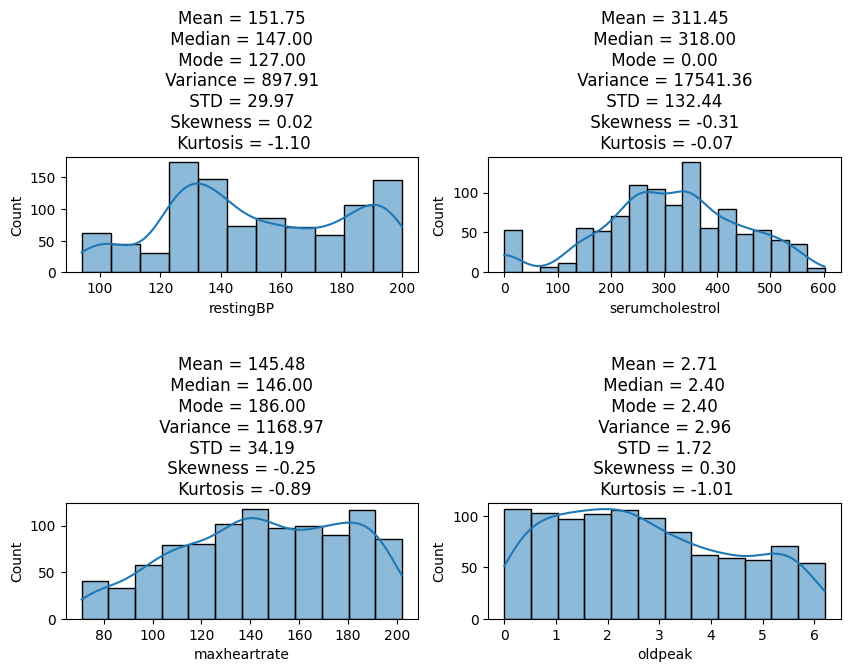

In [ ]:
# Calculate the Skewness for each column in the DataFrame
Skewness = df.skew()
print(f"Skewness values: {Skewness.values}\n")

# Calculate the Kurtosis for each column in the DataFrame
Kurtosis = df.kurtosis()
print(f"Kurtosis values: {Kurtosis.values}\n")

fig, axs = plt.subplots(figsize=(10, 6),ncols=2,nrows=2)

# Create histograms displaying the distribution of specific column values and incorporate the actual distribution curve.
sns.histplot(data=df, x="restingBP", ax=axs[0, 0], kde=True)
axs[0, 0].set_title(f"Mean = {mean_values['restingBP']:.2f}\n Median = {median_values['restingBP']:.2f} \n Mode = {mode_values['restingBP']:.2f} \n Variance = {Variance['restingBP']:.2f} \n STD = {STD['restingBP']:.2f} \n Skewness = {Skewness['restingBP']:0.2f} \n Kurtosis = {Kurtosis['restingBP']:0.2f}")

sns.histplot(data=df, x="serumcholestrol", ax=axs[0, 1], kde=True)
axs[0, 1].set_title(f"Mean = {mean_values['serumcholestrol']:.2f}\n Median = {median_values['serumcholestrol']:.2f} \n Mode = {mode_values['serumcholestrol']:.2f} \n Variance = {Variance['serumcholestrol']:.2f} \n STD = {STD['serumcholestrol']:.2f} \n Skewness = {Skewness['serumcholestrol']:0.2f} \n Kurtosis = {Kurtosis['serumcholestrol']:0.2f}")

sns.histplot(data=df, x="maxheartrate", ax=axs[1, 0], kde=True)
axs[1, 0].set_title(f"Mean = {mean_values['maxheartrate']:.2f}\n Median = {median_values['maxheartrate']:.2f} \n Mode = {mode_values['maxheartrate']:.2f} \n Variance = {Variance['maxheartrate']:.2f} \n STD = {STD['maxheartrate']:.2f} \n Skewness = {Skewness['maxheartrate']:0.2f} \n Kurtosis = {Kurtosis['maxheartrate']:0.2f}")

sns.histplot(data=df, x="oldpeak", ax=axs[1, 1], kde=True)
axs[1, 1].set_title(f"Mean = {mean_values['oldpeak']:.2f}\n Median = {median_values['oldpeak']:.2f} \n Mode = {mode_values['oldpeak']:.2f} \n Variance = {Variance['oldpeak']:.2f} \n STD = {STD['oldpeak']:.2f} \n Skewness = {Skewness['oldpeak']:0.2f} \n Kurtosis = {Kurtosis['oldpeak']:0.2f}")

fig.subplots_adjust(hspace=2)

# 3. Missing values and Outliers

## 3.1. Detecting and Handeling Missing values

Finds the number of missing values in each column.

In [ ]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

Displays the rows that contain empty values.

In [ ]:
df[df.isnull().any(axis=1)]

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target


This shows that the dataset has no missing values.

## 3.2. Detecting and Handeling outliers

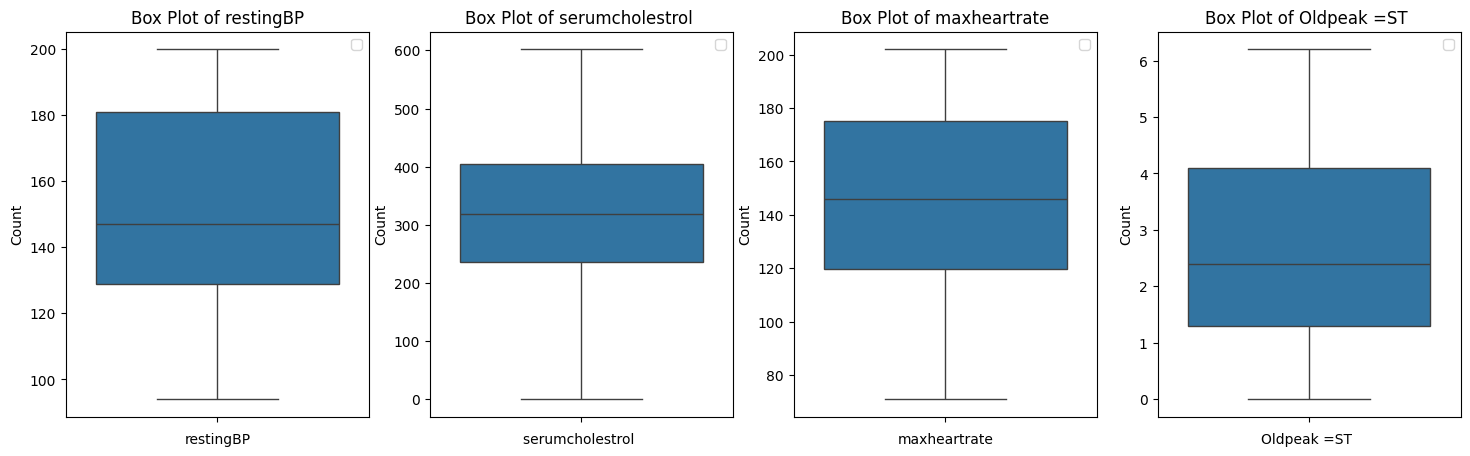

In [ ]:
# Plotting
plt.figure(figsize=(18, 5))

# Plot Training and Validation Loss
plt.subplot(1, 4, 1)
sns.boxplot(df['restingBP'])
plt.title(f'Box Plot of restingBP')
plt.xlabel('restingBP')
plt.ylabel('Count')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 4, 2)
sns.boxplot(df['serumcholestrol'])
plt.title(f'Box Plot of serumcholestrol ')
plt.xlabel('serumcholestrol ')
plt.ylabel('Count')
plt.legend()

# Plot Testing Accuracy
plt.subplot(1, 4, 3)
sns.boxplot(df['maxheartrate'])
plt.title(f'Box Plot of maxheartrate')
plt.xlabel('maxheartrate')
plt.ylabel('Count')
plt.legend()

# Plot Testing Accuracy
plt.subplot(1, 4, 4)
sns.boxplot(df['oldpeak'])
plt.title(f'Box Plot of Oldpeak =ST ')
plt.xlabel('Oldpeak =ST ')
plt.ylabel('Count')
plt.legend()

In [ ]:
columns = ['restingBP', 'serumcholestrol', 'maxheartrate' , 'oldpeak']
for col in columns:
  # Compute percentiles using Pandas quantile() function
  percentile_25 = df[col].quantile(0.25)
  percentile_50 = df[col].quantile(0.5)
  percentile_75 = df[col].quantile(0.75)

  # Compute interquartile range (IQR)
  iqr = percentile_75 - percentile_25

  LowerBound_Height = percentile_25 - 1.5*iqr
  UpperBound_Height = percentile_75 + 1.5*iqr
  NumRecordsBefore=df.shape[0]
  DroppedRecords=df[(df[col]< LowerBound_Height) | (df[col] > UpperBound_Height)].shape[0]
  print(f"Number of outliers based on the Interquartile Range and Boxplots for column {col} is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots for column restingBP is 0 (0.0%)
Number of outliers based on the Interquartile Range and Boxplots for column serumcholestrol is 0 (0.0%)
Number of outliers based on the Interquartile Range and Boxplots for column maxheartrate is 0 (0.0%)
Number of outliers based on the Interquartile Range and Boxplots for column oldpeak is 0 (0.0%)


No outliers has been detected in the data.

# 5. Scaling the data

In [5]:
columns_to_scale = ['patientid', 'age', 'restingBP', 'serumcholestrol', 'maxheartrate' , 'oldpeak']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the DataFrame 'df', which computes the minimum and maximum values for scaling
scaler.fit(df[columns_to_scale])

# Transform and scale the data in 'df' using the fitted scaler
scaled_data = scaler.transform(df[columns_to_scale])

# Create a new DataFrame 'df_scaled' to store the scaled data, maintaining column names from 'df'
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Drop the original columns from 'df' and concatenate 'df_scaled'
df_scaled = pd.concat([df.drop(columns=columns_to_scale), pd.DataFrame(scaled_data, columns=columns_to_scale)], axis=1)

# Reorder the columns to match the original order
df = df_scaled[df.columns.tolist()]

df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,0.000000,0.550000,1,2,0.726415,0.000000,0,1,0.580153,0,0.854839,3,3,1
1,0.001606,0.333333,1,0,0.000000,0.380399,0,1,0.335878,0,0.596774,1,1,0
2,0.001619,0.483333,1,2,0.367925,0.235880,0,0,1.000000,1,0.806452,1,0,0
3,0.002948,0.383333,1,0,0.415094,0.490033,1,1,0.625954,0,0.516129,2,2,1
4,0.004333,0.183333,1,1,0.990566,0.000000,0,2,0.496183,0,0.854839,3,2,1


this step was done so that all features can have equal weights.

# 6. Splitting the data

In [6]:
X, Y = df.drop('target', axis=1), df.target

We splitted the data into input [X] and output [y], our target feature is the class.

# 7. K-Nearest Neighbor (KNN) with K = 1,3

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
knn_model1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_model1.fit(X_train, y_train)

y_pred1 = knn_model1.predict(X_test)

# Calculate accuracy, precision, recall, and ROC-AUC
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
roc_auc1 = roc_auc_score(y_test, knn_model1.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, y_pred1)
conf_matrices_list1 = confusion_matrix(y_test, y_pred1)

FN = conf_matrices_list1[1, 0]
TP = conf_matrices_list1[1, 1]

FNR = FN / (FN + TP)


# Print the results
print(f'For k= 1:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC: {roc_auc1}')
print(f'False Negative Rate (FNR): {FNR}')
print(f'\nConfusion Matrix: \n {conf_matrices_list1}')

For k= 1:
Accuracy: 0.93
Precision: 0.963963963963964
Recall: 0.9145299145299145
F1-score: 0.9385964912280702
ROC-AUC: 0.9331685717227886
False Negative Rate (FNR): 0.08547008547008547

Confusion Matrix: 
 [[ 79   4]
 [ 10 107]]


In [28]:
knn_model3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model3.fit(X_train, y_train)

y_pred3 = knn_model3.predict(X_test)

# Calculate accuracy, precision, recall, and ROC-AUC
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
roc_auc3 = roc_auc_score(y_test, knn_model3.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, y_pred3)
conf_matrices_list3 = confusion_matrix(y_test, y_pred3)

FN = conf_matrices_list3[1, 0]
TP = conf_matrices_list3[1, 1]

FNR = FN / (FN + TP)

print(f'For k= 3:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC: {roc_auc3}')
print(f'False Negative Rate (FNR): {FNR}')
print(f'\nConfusion Matrix: \n {conf_matrices_list3}')

For k= 3:
Accuracy: 0.95
Precision: 0.9572649572649573
Recall: 0.9572649572649573
F1-score: 0.9572649572649573
ROC-AUC: 0.9679229739470705
False Negative Rate (FNR): 0.042735042735042736

Confusion Matrix: 
 [[ 78   5]
 [  5 112]]


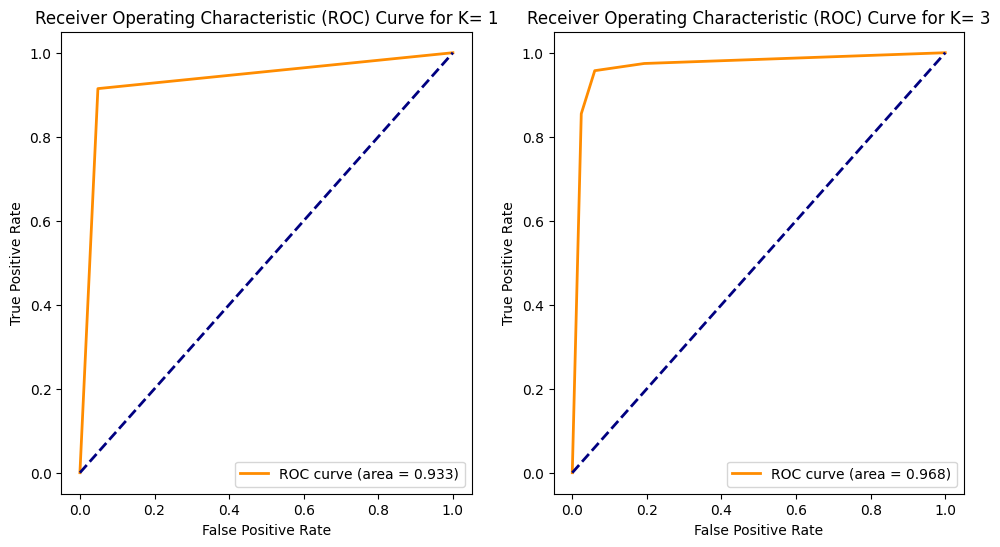

In [29]:
plt.figure(figsize=(18, 6))

# Plot ROC curve
plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test, knn_model1.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for K= 1')
plt.legend(loc='lower right')

# Plot ROC curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, knn_model3.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve for K= 3')
plt.legend(loc='lower right')


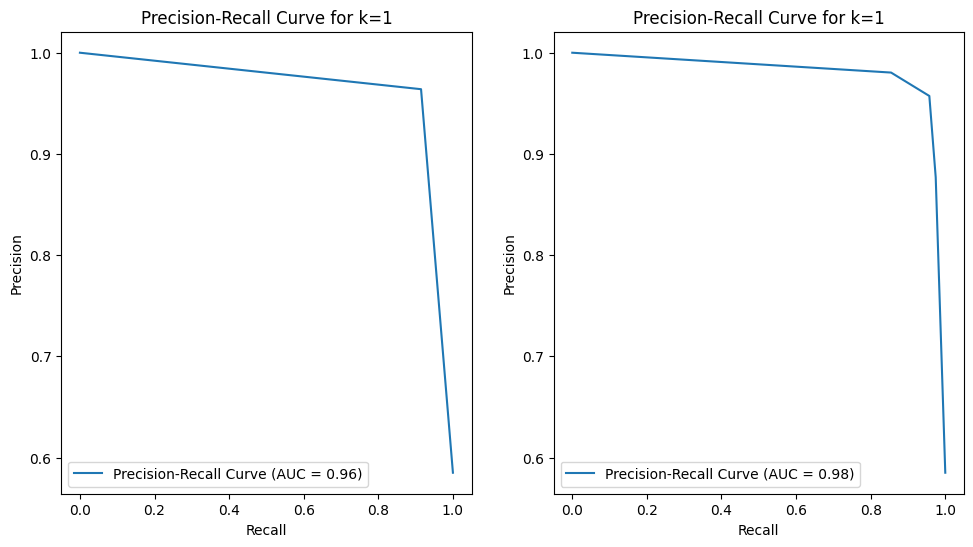

In [30]:
plt.figure(figsize=(18, 6))

# Calculate precision-recall curve
precision_curve1, recall_curve1, _ = precision_recall_curve(y_test, knn_model1.predict_proba(X_test)[:, 1])
precision_curve3, recall_curve3, _ = precision_recall_curve(y_test, knn_model3.predict_proba(X_test)[:, 1])

area_under_curve1 = auc(recall_curve1, precision_curve1)
area_under_curve3 = auc(recall_curve3, precision_curve3)


# Plot precision-recall curve
plt.subplot(1, 3, 1)
plt.plot(recall_curve1, precision_curve1, label=f'Precision-Recall Curve (AUC = {area_under_curve1:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for k=1')
plt.legend()

# Plot precision-recall curve
plt.subplot(1, 3, 2)
plt.plot(recall_curve3, precision_curve3, label=f'Precision-Recall Curve (AUC = {area_under_curve3:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for k=1')
plt.legend()



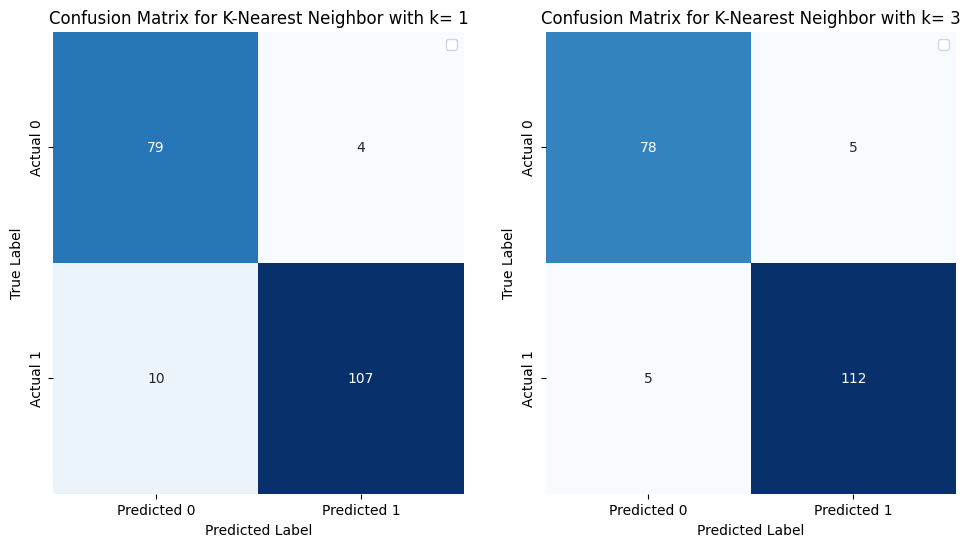

In [31]:
# Visualize the confusion matrix
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrices_list1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbor with k= 1')
plt.legend()

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrices_list3, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbor with k= 3')
plt.legend()

# 8. Support Vector Machine (SVM) model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
parameters = {"kernel":("rbf", "linear", "poly","sigmoid"),
              "C":[1, 10, 50, 100],
              "degree":[1,2,3,4]
              }
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

svc = SVC(random_state=42)
clf = GridSearchCV(svc, parameters, cv=5 , n_jobs=-1 , scoring=scoring , refit='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 1, 'degree': 3, 'kernel': 'poly'}


In [34]:
svm_model = SVC(kernel='poly', C=1, degree=3, random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance for SVM
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

FN = conf_matrix_svm[1, 0]
TP = conf_matrix_svm[1, 1]

FNR = FN / (FN + TP)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(f'False Negative Rate (FNR): {FNR}')
print(f'\nConfusion Matrix for SVM: \n {conf_matrix_svm}')

Accuracy: 0.96
Precision: 0.9658119658119658
Recall: 0.9658119658119658
F1-score: 0.9658119658119658
ROC-AUC: 0.9937184635979817
False Negative Rate (FNR): 0.03418803418803419

Confusion Matrix for SVM: 
 [[ 79   4]
 [  4 113]]


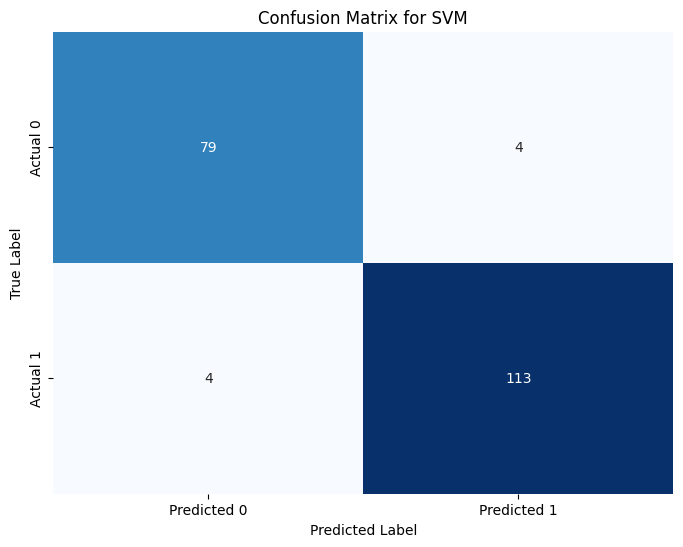

In [35]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

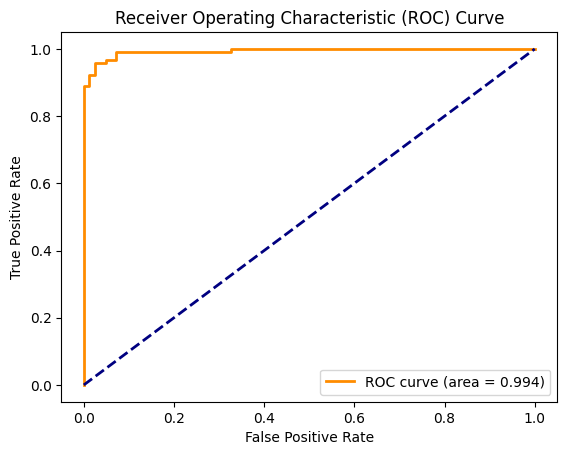

In [36]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

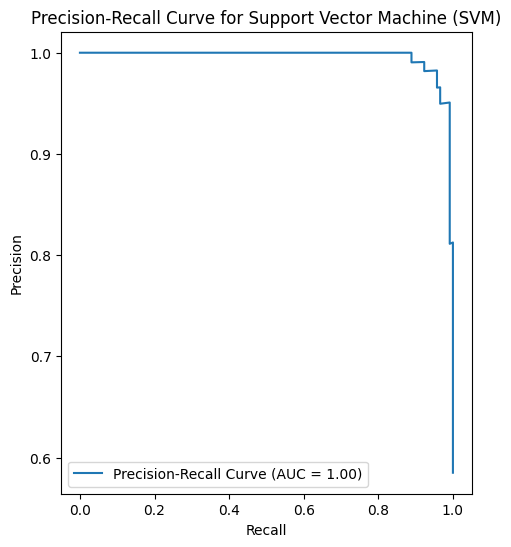

In [37]:
plt.figure(figsize=(18, 6))

# Calculate precision-recall curve
precision_curve1, recall_curve1, _ = precision_recall_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
area_under_curve1 = auc(recall_curve1, precision_curve1)

# Plot precision-recall curve
plt.subplot(1, 3, 1)
plt.plot(recall_curve1, precision_curve1, label=f'Precision-Recall Curve (AUC = {area_under_curve1:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine (SVM)')
plt.legend()

# 9. Random Forest Classifier model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
parameters = {"criterion":("gini", "entropy", "log_loss"),
              "max_depth":[1, 3, 5, 8],
              "max_features":("log2", "sqrt"),
              "n_estimators":[5,10,50,100]
              }
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

rf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf, parameters, cv=5 , n_jobs=-1 , scoring=scoring , refit='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}


In [40]:
rf_model = RandomForestClassifier(criterion = 'entropy',max_depth =8,max_features = 'log2',n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance for SVM
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

FN = conf_matrix_rf[1, 0]
TP = conf_matrix_rf[1, 1]

FNR = FN / (FN + TP)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(f'False Negative Rate (FNR): {FNR}')
print(f'\nConfusion Matrix for Random Forest: \n {conf_matrix_rf}')

Accuracy: 0.985
Precision: 0.9913793103448276
Recall: 0.9829059829059829
F1-score: 0.9871244635193134
ROC-AUC: 0.9996910719802286
False Negative Rate (FNR): 0.017094017094017096

Confusion Matrix for Random Forest: 
 [[ 82   1]
 [  2 115]]


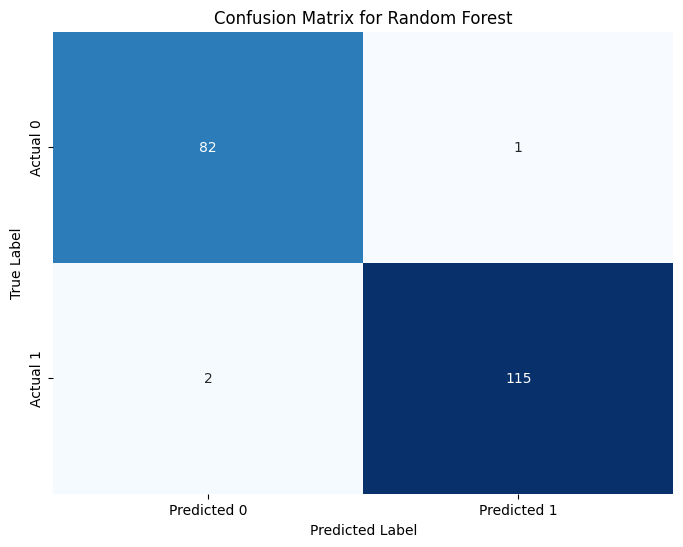

In [41]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

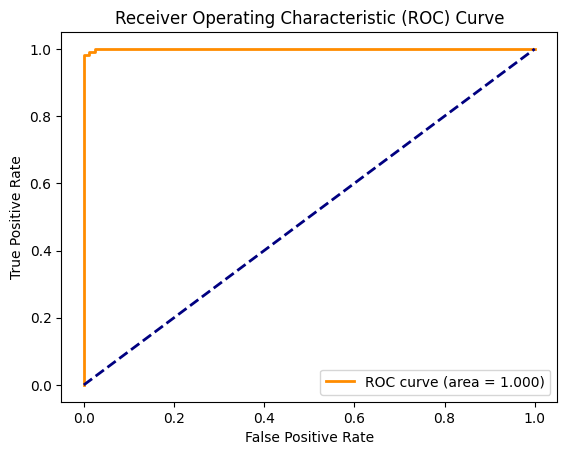

In [42]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

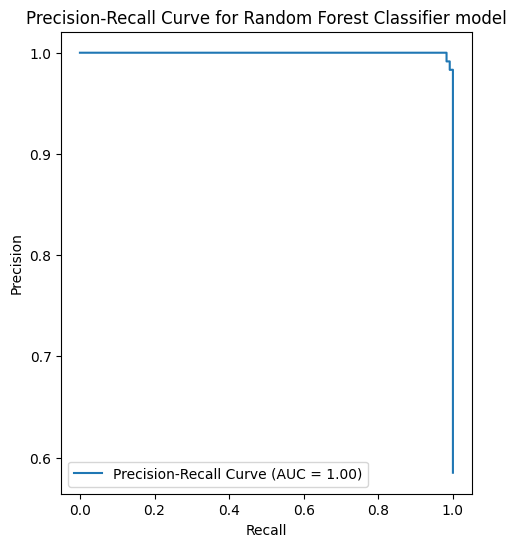

In [43]:
plt.figure(figsize=(18, 6))

# Calculate precision-recall curve
precision_curve1, recall_curve1, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
area_under_curve1 = auc(recall_curve1, precision_curve1)

# Plot precision-recall curve
plt.subplot(1, 3, 1)
plt.plot(recall_curve1, precision_curve1, label=f'Precision-Recall Curve (AUC = {area_under_curve1:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier model')
plt.legend()

In [44]:
misclassified_indices = np.where(y_test != y_pred_rf)[0]

In [45]:
misclassified_instances = X_test.iloc[misclassified_indices]
misclassified_labels = y_test.iloc[misclassified_indices]

In [47]:
print(misclassified_instances)
print("\nLables: ")
print(misclassified_labels)

     patientid       age  gender  chestpain  restingBP  serumcholestrol  \
513   0.502582  0.233333       1          0   0.603774         0.000000   
901   0.902409  0.633333       0          0   0.330189         0.772425   
439   0.434176  0.683333       1          0   0.433962         0.000000   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  \
513                  0                0      0.770992              0   
901                  0                0      0.488550              1   
439                  0                2      0.381679              1   

      oldpeak  slope  noofmajorvessels  
513  0.225806      1                 0  
901  0.419355      2                 0  
439  0.032258      1                 0  

Lables: 
513    1
901    0
439    1
Name: target, dtype: int64
